<a href="https://colab.research.google.com/github/farhanarshad454/perceptron_outlier/blob/main/digit_recognize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [126]:
import numpy as np 
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [127]:


df = pd.read_csv("train.csv")



In [128]:


df.head()



,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [129]:


df.shape



(2290, 785)

digit is  0.0


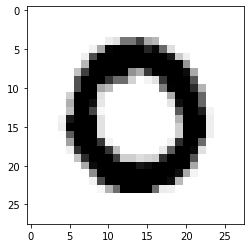

In [130]:


# print a digit 
digit = df.iloc[1][1:].values.reshape(28,28)
plt.imshow(digit,cmap='binary')
print("digit is ",df.iloc[1][0])



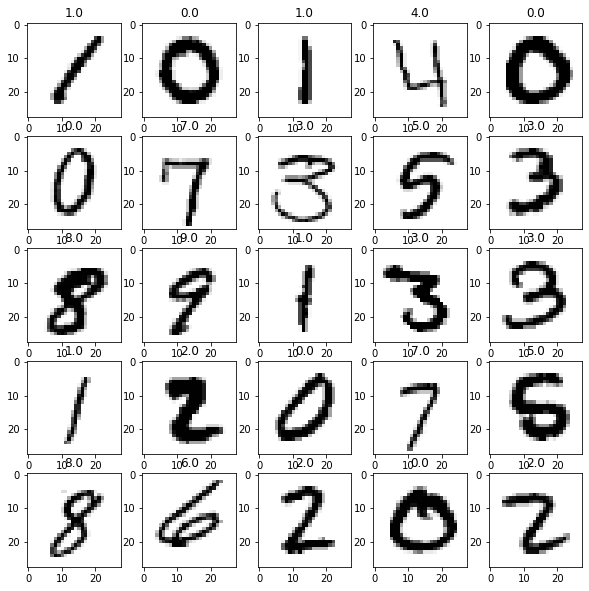

In [131]:
# print 25 no 
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    digit = df.iloc[i][1:].values.reshape(28,28)
    plt.imshow(digit, cmap = 'binary')
    plt.title(df.iloc[i][0])


In [132]:
x  = df.drop("label",axis=1)
y = df['label']

In [133]:
# normalise the input 
x = x/255.0

In [134]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size = 0.2 )

In [135]:


model = tf.keras.Sequential([
    tf.keras.layers.Dense(128,activation ='relu',input_shape=(784,)),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(32,activation = 'relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax')
])



In [136]:
# model 
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_26 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_27 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_28 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_29 (Dense)             (None, 10)                170       
Total params: 111,514
Trainable params: 111,514
Non-trainable params: 0
_________________________________________________________________


In [137]:


model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])



In [138]:
model.fit(x_train,y_train , epochs=20, validation_data =( x_test,y_test))

Epoch 1/20
58/58 [==============================] - 1s 6ms/step - loss: nan - accuracy: 0.1002 - val_loss: nan - val_accuracy: 0.1114
Epoch 2/20
58/58 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0986 - val_loss: nan - val_accuracy: 0.1114
Epoch 3/20
58/58 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.1058 - val_loss: nan - val_accuracy: 0.1114
Epoch 4/20
58/58 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0940 - val_loss: nan - val_accuracy: 0.1114
Epoch 5/20
58/58 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.1051 - val_loss: nan - val_accuracy: 0.1114
Epoch 6/20
58/58 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0962 - val_loss: nan - val_accuracy: 0.1114
Epoch 7/20
58/58 [==============================] - 0s 3ms/step - loss: nan - accuracy: 0.0943 - val_loss: nan - val_accuracy: 0.1114
Epoch 8/20
58/58 [==============================] - 0s 3ms/ste

In [139]:


# classification matrix 
y_pred= model.predict(x_test)
y_pred = np.argmax(y_pred,axis=1)
print(classification_report(y_pred,y_test))



              precision    recall  f1-score   support

           0       1.00      0.11      0.20       458
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.11       458
   macro avg       0.10      0.01      0.02       458
weighted avg       1.00      0.11      0.20       458



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
X_test = pd.read_csv('test.csv')

In [141]:


# X_test = pd.read_csv('test.csv')

# index=pd.read_csv('sample_submission.csv')
# index.shape
# print(index['ImageId'].shape)
# indexs =index.iloc[1:2294,1:2].values
# indexs.shape
# # print(indexs['ImageId'].shape)

In [142]:
submit = pd.DataFrame(np.argmax(model.predict(X_test), axis=1), columns=['Label'],index=pd.read_csv('sample_submission.csv')[1:2295]['ImageId'])

submit.index.name = 'ImageId'
submit.to_csv('submittion.csv')
submit

,Label
ImageId,
2,0
3,0
4,0
5,0
6,0
...,...
2291,0
2292,0
2293,0
